In [43]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
%matplotlib inline
pd.set_option('display.max_columns', None)

In [13]:
!pwd

In [19]:
traino = pd.read_csv('../processed_data/train_ordinal.csv')

In [20]:
traino.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
618,619,20,rl,90,11694,pave,nothing,reg,lvl,allpub,...,0,0,0,nothing,0,7,2007,new,partial,314813
336,337,20,rl,86,14157,pave,nothing,ir1,hls,allpub,...,0,0,0,nothing,0,7,2007,wd,normal,377426
379,380,60,rl,60,8123,pave,nothing,ir1,lvl,allpub,...,0,0,0,nothing,0,6,2009,wd,normal,179000
108,109,50,rm,85,8500,pave,nothing,reg,lvl,allpub,...,0,0,0,nothing,0,8,2007,wd,normal,115000
713,714,190,rl,60,9873,pave,nothing,reg,lvl,allpub,...,0,0,0,nothing,0,5,2006,wd,normal,129000


In [ ]:
# pd.get_dummies
# df[df.applymap(np.isreal)]

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <a list of 30 Patch objects>)

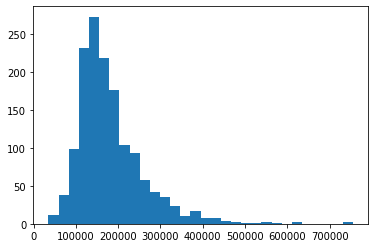

In [41]:
plt.hist(traino.SalePrice, bins = 30)
#plt.xscale("log")
#mu, sigma = stats.norm.fit(traino.SalePrice)
#best_fit_line = stats.norm.pdf(20, mu, sigma)
#plt.plot(20, best_fit_line)

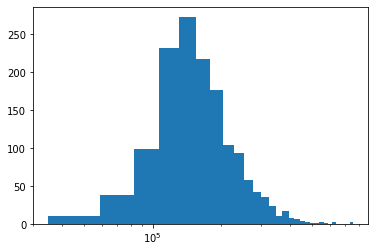

In [42]:
plt.hist(traino.SalePrice, bins = 30)
plt.xscale("log")

In [45]:
traino.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

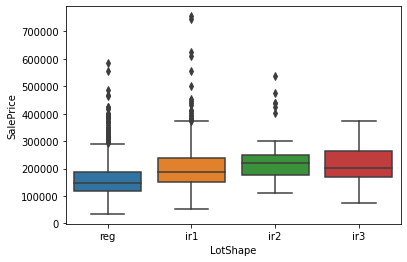

In [52]:
sns.boxplot(x='LotShape', y='SalePrice', data=traino)

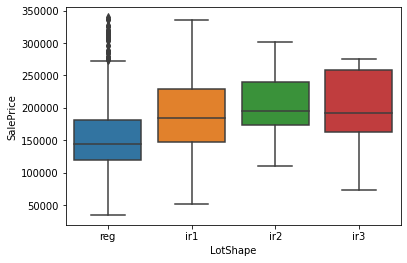

In [56]:
traino_saleprice_c = traino[traino.SalePrice.apply(lambda x: np.abs(x-traino.SalePrice.mean())/traino.SalePrice.std() < 2)] # 95% of data
sns.boxplot(x='LotShape', y='SalePrice', data=traino_saleprice_c)

In [82]:
traino.loc[:,['LotShape', "SalePrice"]]
traino.loc[traino.LotShape == 'reg', ["SalePrice"]]
traino.loc[traino.LotShape == 'reg', "SalePrice"]

0       208500
1       181500
6       307000
8       129900
9       118000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 925, dtype: int64

In [83]:

stats.ttest_ind(traino.loc[traino.LotShape == 'reg', "SalePrice"], traino.loc[traino.LotShape == 'ir1', "SalePrice"])

Ttest_indResult(statistic=-9.7462638805652, pvalue=9.171976277508485e-22)

(array([  2.,   0.,   5.,   2.,   0.,   4.,   1.,   1.,  10.,   3.,   2.,
         22.,  25.,  41.,  21.,  35.,  20.,  13.,  20.,  30.,  17.,  18.,
         52.,  41.,  74.,  57.,  74.,  56.,  83.,  29.,  81.,  30.,  18.,
         22.,  30.,  69.,  64., 112., 185.,  91.]),
 array([1872.  , 1875.45, 1878.9 , 1882.35, 1885.8 , 1889.25, 1892.7 ,
        1896.15, 1899.6 , 1903.05, 1906.5 , 1909.95, 1913.4 , 1916.85,
        1920.3 , 1923.75, 1927.2 , 1930.65, 1934.1 , 1937.55, 1941.  ,
        1944.45, 1947.9 , 1951.35, 1954.8 , 1958.25, 1961.7 , 1965.15,
        1968.6 , 1972.05, 1975.5 , 1978.95, 1982.4 , 1985.85, 1989.3 ,
        1992.75, 1996.2 , 1999.65, 2003.1 , 2006.55, 2010.  ]),
 <a list of 40 Patch objects>)

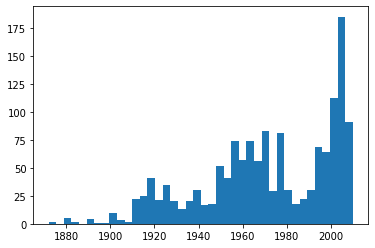

In [86]:
plt.hist(traino.YearBuilt, bins = 40)

In [87]:
traino[traino.YearBuilt<1900,]

TypeError: '(0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: YearBuilt, Length: 1460, dtype: bool,)' is an invalid key